<a href="https://colab.research.google.com/github/Chaitanyapp12/Data-Science/blob/main/Predicting_Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Overview:
   Age  MonthlyIncome  JobSatisfaction  WorkLifeBalance  YearsAtCompany  \
0   58          14559                1                3               8   
1   48           6368                1                1              12   
2   34           6797                4                1               5   
3   27          18114                1                1               5   
4   40          16718                4                2              19   

   OverTime  Attrition  
0         1          1  
1         1          1  
2         0          1  
3         0          0  
4         1          0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              1000 non-null   int64
 1   MonthlyIncome    1000 non-null   int64
 2   JobSatisfaction  1000 non-null   int64
 3   WorkLifeBalance  1000 non-null   int64
 4   YearsAt

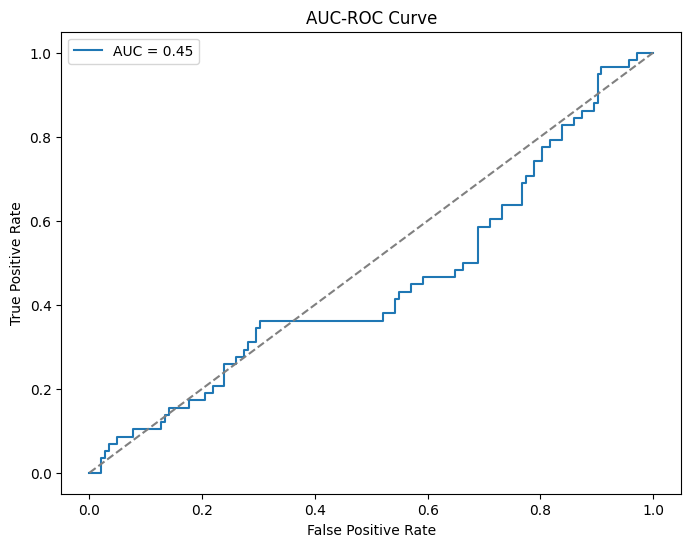

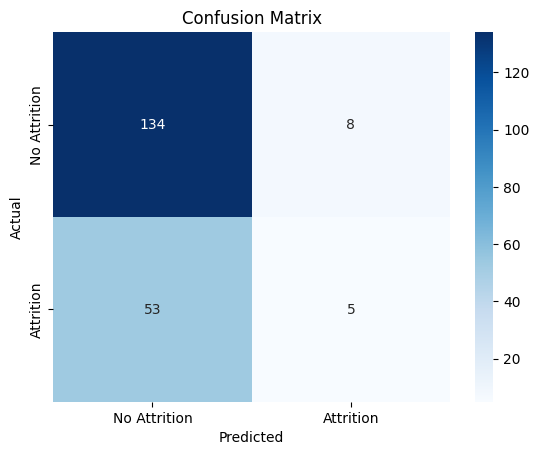

Generating SHAP values for interpretability...


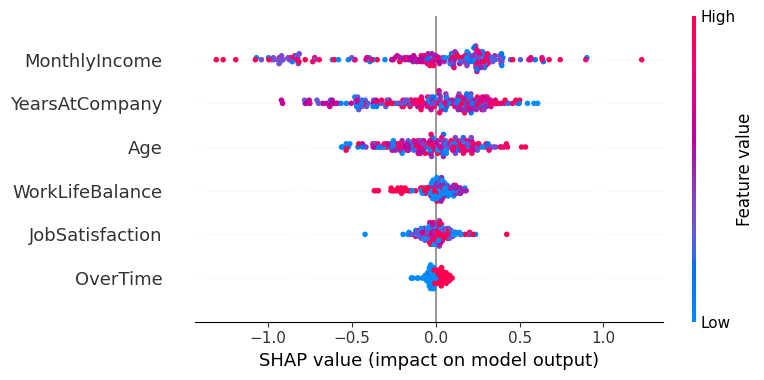

Model saved as employee_attrition_model.pkl


In [5]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
from xgboost import XGBClassifier
import shap
import joblib

# Step 2: Generate Synthetic Dataset
np.random.seed(42)
n_samples = 1000
data = pd.DataFrame({
    'Age': np.random.randint(20, 60, n_samples),
    'MonthlyIncome': np.random.randint(3000, 20000, n_samples),
    'JobSatisfaction': np.random.randint(1, 5, n_samples),
    'WorkLifeBalance': np.random.randint(1, 4, n_samples),
    'YearsAtCompany': np.random.randint(0, 30, n_samples),
    'OverTime': np.random.choice([0, 1], size=n_samples),  # 0 = No, 1 = Yes
    'Attrition': np.random.choice([0, 1], size=n_samples, p=[0.7, 0.3])  # Target variable
})

# Inspect the dataset
print("Dataset Overview:")
print(data.head())
print(data.info())

# Step 3: Preprocessing
X = data.drop(['Attrition'], axis=1)
y = data['Attrition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Model Training using XGBoost
print("Training the XGBoost model...")
model = XGBClassifier(random_state=42, n_estimators=100, max_depth=4, learning_rate=0.1)
model.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# AUC-ROC Curve
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend()
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 6: Feature Importance with SHAP
print("Generating SHAP values for interpretability...")
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Step 7: Save the Model
joblib.dump(model, 'employee_attrition_model.pkl')
print("Model saved as employee_attrition_model.pkl")
